In [1]:
from fft import *
import matplotlib.pyplot as plt

In [2]:
def linear_convolution_direct(x, h):
    """
    Compute the linear convolution of x and h using np.convolve.
    This yields an output of length len(x)+len(h)-1.
    """
    return np.convolve(x, h, mode='full')

def linear_convolution_fft(x, h):
    """
    Compute the linear convolution using the FFT.
    Both x and h are zero-padded to length N = len(x)+len(h)-1 before
    computing the FFTs, so that the circular convolution computed via FFT
    corresponds to the linear convolution.
    """
    N = len(x) + len(h) - 1
    X = FFT1D(np.pad(x, (0, N - len(x))))
    H = FFT1D(np.pad(h, (0, N - len(h))))
    Y = IFFT1D(X * H)
    return Y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if two input arrays are almost equal element-wise.
    """
    return np.allclose(a, b, atol=tol)

In [3]:
def convolution(x, h):
    """
    For now, let's start by assuming that x and h are the same size
    """
    n = len(x)
    y = np.zeros(n, dtype=complex)
    for k in range(n):
        for m in range(n):
            y[k] += x[m] * h[(k - m) % n]
    return y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if the two input lists a and b are almost equal or not, with respect to a given tolerance "tol"
    """
    return np.allclose(a, b, atol=tol)

## Test 1: FFT and IFFT Correctness

Generate a random signal of arbitrary length, compute its FFT and then its IFFT, and verify that the recovered signal is close to the original.

In [4]:
x = np.random.random(10) + 1j * np.random.random(10)
X = FFT1D(x)
x_rec = IFFT1D(X)
print('Original signal:', x)
print('Recovered signal:', x_rec)
print('FFT/IFFT recovery successful:', arrays_almost_equal(x, x_rec))

Original signal: [0.53596428+0.68235658j 0.80893802+0.94301495j 0.25196427+0.36276572j
 0.34509774+0.81645248j 0.53178802+0.83093145j 0.10870788+0.1299128j
 0.86905383+0.46267104j 0.47939676+0.94516216j 0.20083647+0.84530547j
 0.6979447 +0.72641256j]
Recovered signal: [0.53596428+0.68235658j 0.80893802+0.94301495j 0.25196427+0.36276572j
 0.34509774+0.81645248j 0.53178802+0.83093145j 0.10870788+0.1299128j
 0.86905383+0.46267104j 0.47939676+0.94516216j 0.20083647+0.84530547j
 0.6979447 +0.72641256j]
FFT/IFFT recovery successful: True


## Test 2: Convolution and Multiplication Relationship

For two signals `x` and `h`, the convolution computed directly in the time domain should equal the result obtained by:

1. Computing the FFT of both signals
2. Multiplying the resulting spectra element-wise
3. Applying the IFFT to the product.

I perform both computations and compare the results.

In [5]:
signal_length = 64
filter_length = 8
signal = np.random.random(signal_length) + 1j * np.random.random(signal_length)
filter = np.random.random(filter_length) + 1j * np.random.random(filter_length)

y_direct = linear_convolution_direct(signal, filter)
print(y_direct.shape)
y_fft = linear_convolution_fft(signal, filter)

print('\nDirect linear convolution:', y_direct)
print('\nFFT-based linear convolution:', y_fft)
print('\nConvolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))

(71,)

Direct linear convolution: [-0.05181559+0.39401032j  0.30332447+0.62911279j  0.17946923+0.73941437j
 -0.31664314+1.71652424j  0.30130368+1.92580654j  0.36751663+1.39782844j
  0.06498781+1.89721048j  0.8042735 +1.88026132j  0.93342402+2.24929878j
  0.84393434+3.72355848j  0.91192513+3.2022916j   1.17274662+2.93517237j
  0.99741254+3.11272729j  0.88512674+3.67753911j  0.71031442+4.06234944j
  0.3611238 +3.95482045j -0.24453102+3.53863321j  0.37441997+3.31123119j
 -0.51373657+3.08380529j -0.09602398+3.56939756j -0.55417062+3.76468949j
  0.09072651+3.1651834j   0.48129439+3.15239947j  0.54149765+3.44305474j
  0.15985588+3.2222531j   0.53334119+2.72123061j  0.46510477+3.87557581j
  1.37609528+2.92551106j  1.03832313+2.97116946j  1.14154456+3.6061583j
  0.81148525+2.28193599j  0.9692655 +3.10359388j  1.38049627+3.84729609j
  1.31168835+2.77623024j  1.14561554+2.74053862j  0.41770925+2.95951699j
  0.3612606 +3.37655367j  0.1608283 +3.66770461j -0.36520522+3.63545665j
 -0.414883  +3.719

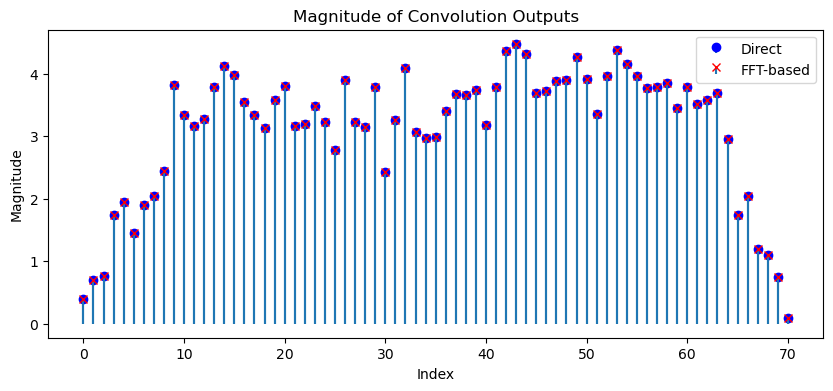

In [6]:
plt.figure(figsize=(10, 4))
plt.stem(np.abs(y_direct), markerfmt='bo', basefmt=" ", label='Direct')
plt.stem(np.abs(y_fft), markerfmt='rx', basefmt=" ", label='FFT-based')
plt.title('Magnitude of Convolution Outputs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()